In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt

In [22]:
img_size = 224
batch_size = 32
epochs = 10
train_path = '../dataset/asl_alphabet_train/asl_alphabet_train'

test_path = '../dataset/asl_alphabet_test/asl_alphabet_test'

cp_path = '../model/Checkpoints'

In [11]:
augment_train_data = ImageDataGenerator(horizontal_flip=True,
                                        rotation_range=50,
                                        zoom_range=0.2,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        rescale=1./255,
                                        validation_split=0.1)
augment_test_data = ImageDataGenerator(rescale=1./255)

In [12]:
train_dataset = augment_train_data.flow_from_directory(train_path,
                                                       shuffle=True,
                                                       classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                                                                'L', 'M', 'N',
                                                                'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y',
                                                                'Z', 'space',
                                                                'del', 'nothing'],
                                                       target_size=(
                                                           img_size, img_size),
                                                       batch_size=batch_size)


Found 87000 images belonging to 29 classes.


In [16]:
test_dataset = augment_train_data.flow_from_directory(test_path,
                                                      classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                                                               'L', 'M', 'N',
                                                               'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y',
                                                               'Z', 'space', 'del', 'nothing'],
                                                      target_size=(
                                                          img_size, img_size),
                                                      batch_size=batch_size)

Found 28 images belonging to 29 classes.


In [23]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=cp_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

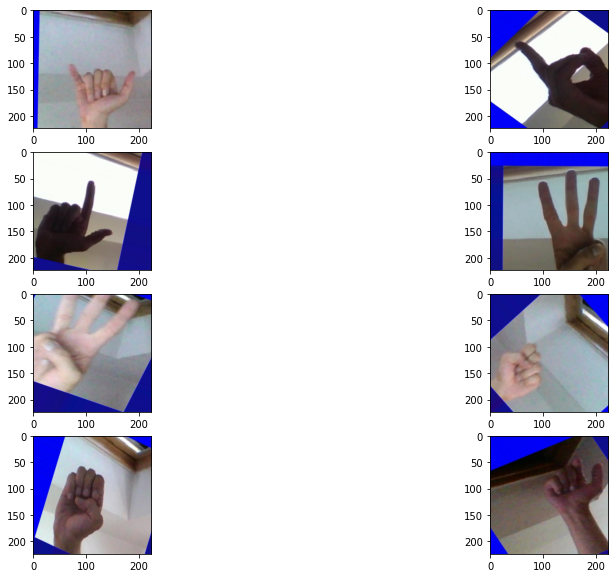

In [17]:
fig = plt.figure(figsize=(15, 10))
for i in range(1,9):
    plt.subplot(4,2,i)
    plt.imshow(train_dataset[0][0][i-1])
plt.show()

In [18]:
url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

download_model = hub.KerasLayer(url,input_shape=(img_size,img_size,3))

model = Sequential([
    download_model,
    Dense(29),
    Activation("softmax")
])

In [20]:
model.compile(optimizer=Adam(1e-3),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [24]:
print("\n Model summary: ")
print(model.summary())

print("\n Model Training: ")
model.fit(train_dataset,
          batch_size=batch_size,
          epochs=epochs,
         callbacks=[model_checkpoint_callback])


 Model summary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 29)                29058     
                                                                 
 activation (Activation)     (None, 29)                0         
                                                                 
Total params: 3,569,323
Trainable params: 29,058
Non-trainable params: 3,540,265
_________________________________________________________________
None

 Model Training: 
Epoch 1/10
2719/2719 [==============================] - ETA: 0s - loss: 0.5248 - accuracy: 0.8366WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2719/2719 [==============================] - 613s 225ms/step - loss: 0.5248 - accuracy: 0.8366
Epoch 2/10
2719/2719 [==============================] - ETA: 0s - loss: 0.4932 - accuracy: 0.8466WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2719/2719 [==============================] - 613s 225ms/step - loss: 0.4932 - accuracy: 0.8466
Epoch 3/10
2719/2719 [==============================] - ETA: 0s - loss: 0.4662 - accuracy: 0.8546WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2719/2719 [==============================] - 623s 229ms/step - loss: 0.4662 - accuracy: 0.8546
Epoch 4/10
2719/2719 [==============================] - ETA: 0s - loss: 0.4513 - accuracy: 0.8610WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2719/2719 [==============================] - 628s 231ms/step - loss: 0.4513 - accuracy: 0.8610
Epoch 5/10
2719/2719 [==============================] - ETA: 0s - loss: 0.4373 - accuracy: 0.8645WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2719/2719 [==============================] - 608s 223ms/step - loss: 0.4373 - accuracy: 0.8645
Epoch 6/10
2719/2719 [==============================] - ETA: 0s - loss: 0.4369 - accuracy: 0.8650WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2719/2719 [==============================] - 613s 226ms/step - loss: 0.4369 - accuracy: 0.8650
Epoch 7/10
2719/2719 [==============================] - ETA: 0s - loss: 0.4334 - accuracy: 0.8666WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2719/2719 [==============================] - 610s 224ms/step - loss: 0.4334 - accuracy: 0.8666
Epoch 8/10
2719/2719 [==============================] - ETA: 0s - loss: 0.4237 - accuracy: 0.8694WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2719/2719 [==============================] - 610s 224ms/step - loss: 0.4237 - accuracy: 0.8694
Epoch 9/10
2719/2719 [==============================] - ETA: 0s - loss: 0.4111 - accuracy: 0.8737WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2719/2719 [==============================] - 618s 227ms/step - loss: 0.4111 - accuracy: 0.8737
Epoch 10/10
2719/2719 [==============================] - ETA: 0s - loss: 0.4161 - accuracy: 0.8738WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2719/2719 [==============================] - 610s 224ms/step - loss: 0.4161 - accuracy: 0.8738


In [25]:
print("\n Model Evaluation: ")
model.evaluate(test_dataset)


 Model Evaluation: 
1/1 [==============================] - 1s 1s/step - loss: 0.2079 - accuracy: 0.9286


[0.2078545093536377, 0.9285714030265808]

In [26]:
model.save("../model/asl_model")

INFO:tensorflow:Assets written to: ../model/asl_model\assets


INFO:tensorflow:Assets written to: ../model/asl_model\assets
